<a href="https://colab.research.google.com/github/ElizabethB111/MESA-8410-Final-Project/blob/main/Q1_Q2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA for Q1:**
#Addressing Question 1: Are WHD more effective when women or men are running them, with effectiveness indicated by actions (FIR, DIR, arrests) and lessening of CAW?

FIR = First Information Reports

DIR = Domestic Incidence Reports

CAW = Crimes Against Women

**Further down the document, see EDA for Q2.**

In [ ]:
# IMPORT LIBRARIES BELOW
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Add a special library for working with tables:
from tabulate import tabulate


### Reading in the data
First mount the google drive;
The data is in csv format and stored in "Colab Notebooks/Final Project/Data/". Import the data into a dataframe named `admin_wide_cleaned_data`.

In [ ]:
# the code below allows you to access Google Drive.
from google.colab import drive

drive.mount('/content/drive')

# root_dir is the path to your My_Drive folder.
root_dir = "/content/drive/My Drive/"

# Store the dataframes in the following directory.
data_folder = root_dir + "Colab Notebooks/Final Project/Data/"

# the CSV data file contains admin_wide_data with dropped columns and checked for no missing values
inputfile1 = "/content/drive/My Drive/Colab Notebooks/Final Project/Data/admin_wide_station_level_means_data.csv"


# Read the CSV file into a dataframe
admin_wide_station_level_means_data = pd.read_csv(inputfile1)


Mounted at /content/drive


### Double-Checking Sample Records and Descriptive Stats of the Data


In [ ]:
# Use `head()` to get an overview of the first few records in the dataset
admin_wide_station_level_means_data.head(5)

,ps_code,treatment,women_whd,regular_whd,e_caw_rate,e_fir_overall_count,e_fir_caw_count,e_fir_bywomen_count,e_arrest_count,e_dir_count
0,1001.0,Treatment,1.0,0.0,0.000000,33.500,10.375,5.000,14.000,0.500
1,1002.0,Control,0.0,0.0,0.114887,17.000,2.000,1.625,3.125,0.000
2,1003.0,Control,0.0,0.0,0.043200,42.625,8.250,5.000,12.875,0.000
3,1004.0,Treatment,0.0,1.0,0.000000,13.000,2.625,2.000,4.375,1.125
4,1005.0,Treatment,1.0,0.0,0.000000,11.000,1.250,1.125,1.625,0.000


In [ ]:
#Double-checking for no missing values
admin_wide_station_level_means_data.shape
admin_wide_station_level_means_data.info()
#There are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ps_code              180 non-null    float64
 1   treatment            180 non-null    object 
 2   women_whd            180 non-null    float64
 3   regular_whd          180 non-null    float64
 4   e_caw_rate           180 non-null    float64
 5   e_fir_overall_count  180 non-null    float64
 6   e_fir_caw_count      180 non-null    float64
 7   e_fir_bywomen_count  180 non-null    float64
 8   e_arrest_count       180 non-null    float64
 9   e_dir_count          180 non-null    float64
dtypes: float64(9), object(1)
memory usage: 14.2+ KB


In [ ]:
admin_wide_station_level_means_data['women_whd'].value_counts()

,count
women_whd,
0.0,121
1.0,59


In [ ]:
admin_wide_station_level_means_data['regular_whd'].value_counts()

,count
regular_whd,
0.0,119
1.0,61




Remove control row (which has no whd run by either men or women) to focus on the research question in some graphs.

In [ ]:
#Code in 4 rows below was partially inspired by Gemini.
# Create a boolean mask for rows where both columns are 0
mask = (admin_wide_station_level_means_data['regular_whd'] == 0) & (admin_wide_station_level_means_data['women_whd'] == 0)

# Apply the inverted mask to filter admin_wide_cleaned_data
filtered_admin_wide_station_level_means_data = admin_wide_station_level_means_data[~mask]




After removing control rows, make sure the resulting value counts are expected for regular_whd and women_whd.

In [ ]:
filtered_admin_wide_station_level_means_data['regular_whd'].value_counts()

,count
regular_whd,
1.0,61
0.0,59


In [ ]:
filtered_admin_wide_station_level_means_data['women_whd'].value_counts()

,count
women_whd,
0.0,61
1.0,59


In [ ]:
# make a list called `FIR_DIR_Arrests` that holds the names of these columns.
FIR_DIR_ARRESTS = ['e_fir_overall_count', 'e_fir_bywomen_count', 'e_arrest_count', 'e_dir_count']
#
# make a copy of data with just these columns
FIR_DIR_ARRESTS_DATA = filtered_admin_wide_station_level_means_data[FIR_DIR_ARRESTS]

In [ ]:
filtered_admin_wide_station_level_means_data.groupby(['regular_whd', 'women_whd'])[FIR_DIR_ARRESTS].agg(sum)

<ipython-input-12-6d66ad9faeaa>:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  filtered_admin_wide_station_level_means_data.groupby(['regular_whd', 'women_whd'])[FIR_DIR_ARRESTS].agg(sum)


,,e_fir_overall_count,e_fir_bywomen_count,e_arrest_count,e_dir_count
regular_whd,women_whd,,,,
0.0,1.0,1981.25,184.375,243.125,52.25
1.0,0.0,1974.00,165.625,219.875,55.25


# It's an ok table, but maybe could be better visualized if narrower. Split into before/end categories.

In [ ]:
FIR = ['e_fir_caw_count', 'e_fir_bywomen_count']
DIR = ['e_dir_count']
ARRESTS = ['e_arrest_count']


In [ ]:
filtered_admin_wide_station_level_means_data.groupby(['regular_whd', 'women_whd'])[FIR].agg(sum)

<ipython-input-14-dd86be2c827d>:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  filtered_admin_wide_station_level_means_data.groupby(['regular_whd', 'women_whd'])[FIR].agg(sum)


,,e_fir_caw_count,e_fir_bywomen_count
regular_whd,women_whd,,
0.0,1.0,293.25,184.375
1.0,0.0,250.00,165.625


## The table above shows that more First Incidence Reports (FIR) were filed in the woman-run WHD than the regular WHD by the end of the treatment.

In [ ]:
filtered_admin_wide_station_level_means_data.groupby(['regular_whd', 'women_whd'])[DIR].agg(sum)

<ipython-input-15-8de4db9ed628>:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  filtered_admin_wide_station_level_means_data.groupby(['regular_whd', 'women_whd'])[DIR].agg(sum)


,,e_dir_count
regular_whd,women_whd,
0.0,1.0,52.25
1.0,0.0,55.25


# The table above shows that Domestic Incidence Reports (DIR) increased by the end of treatment in both woman-run WHD and regular WHD, and that regular WHD filed more DIR both at the beginning and end of the treatment.

# This is a different result than FIR reports. There were more FIR reports in woman-run WHD than regular WHD by the end of treatment.

In [ ]:
filtered_admin_wide_station_level_means_data.groupby(['regular_whd', 'women_whd'])[ARRESTS].agg(sum)

<ipython-input-16-682fc65d4bef>:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  filtered_admin_wide_station_level_means_data.groupby(['regular_whd', 'women_whd'])[ARRESTS].agg(sum)


,,e_arrest_count
regular_whd,women_whd,
0.0,1.0,243.125
1.0,0.0,219.875


# The table above shows that more arrests resulted from woman-run WHD at both beginning and end of treatment. However, overall arrests decreased by the end of treatment.

# A hypothesis is that the better training resulted in higher awareness in how to deal with the problem, making slightly fewer arrests necessary.

Trying another view...

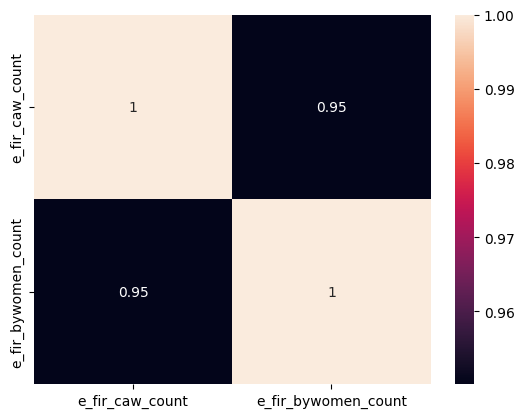

In [ ]:
correlations = filtered_admin_wide_station_level_means_data[FIR].corr()
_ = sns.heatmap(correlations, annot=True)

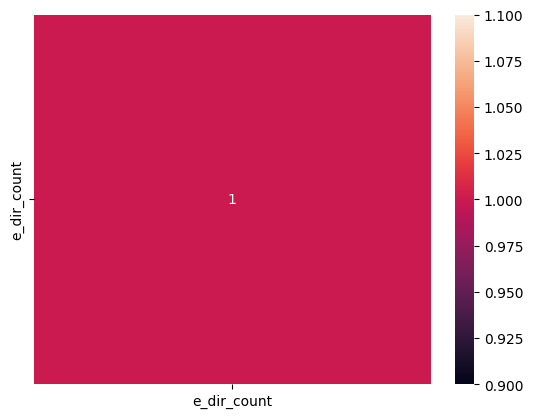

In [ ]:
correlations = filtered_admin_wide_station_level_means_data[DIR].corr()
_ = sns.heatmap(correlations, annot=True)

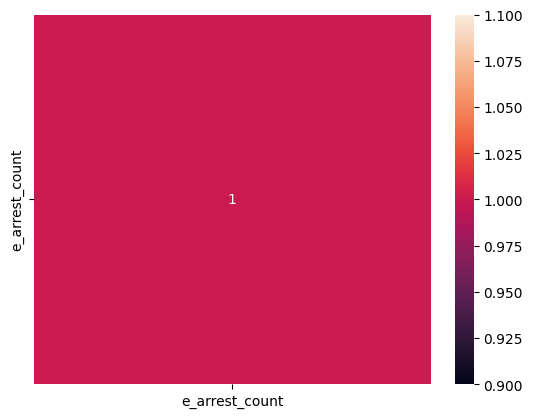

In [ ]:
correlations = filtered_admin_wide_station_level_means_data[ARRESTS].corr()
_ = sns.heatmap(correlations, annot=True)

#The heatmaps didn't show much helpful info.

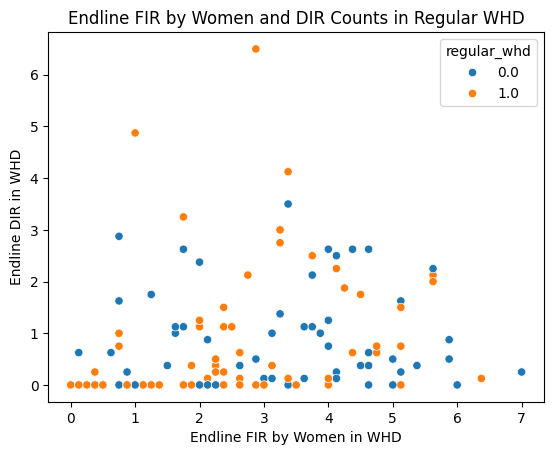

In [ ]:
_ = sns.scatterplot(
     data=filtered_admin_wide_station_level_means_data,
    x='e_fir_bywomen_count',
    y='e_dir_count',
    hue='regular_whd'
)
_ = plt.title('Endline FIR by Women and DIR Counts in Regular WHD')
_ = plt.xlabel('Endline FIR by Women in WHD')
_ = plt.ylabel('Endline DIR in WHD')
#

# Getting Better!

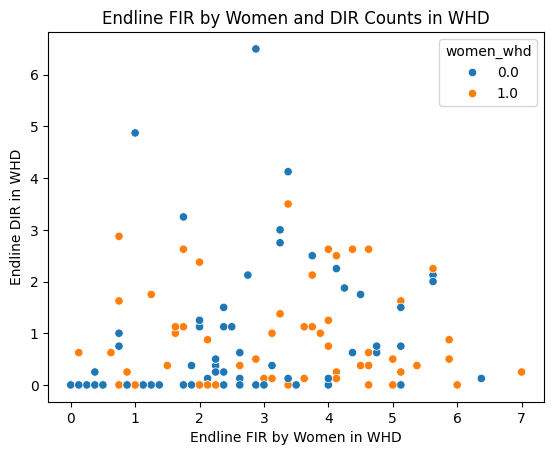

In [ ]:
_ = sns.scatterplot(
     data=filtered_admin_wide_station_level_means_data,
    x='e_fir_bywomen_count',
    y='e_dir_count',
    hue='women_whd'
)
_ = plt.title('Endline FIR by Women and DIR Counts in WHD')
_ = plt.xlabel('Endline FIR by Women in WHD')
_ = plt.ylabel('Endline DIR in WHD')

#Similar
Take another look at the summary statistics.

In [ ]:

summary_stats = filtered_admin_wide_station_level_means_data.describe().round(2)
# Print the numeric summaries:
print("Summary Statistics")
display(summary_stats)

# Transpose the summary statistics tables (turn them sideways) to make them more readable, using .T
summary_stats_transposed = summary_stats.T

# Display the transposed summary statistics
print("Summary Statistics: (transposed)")
display(summary_stats_transposed)

Summary Statistics


,ps_code,women_whd,regular_whd,e_caw_rate,e_fir_overall_count,e_fir_caw_count,e_fir_bywomen_count,e_arrest_count,e_dir_count
count,120.00,120.00,120.00,120.00,120.00,120.00,120.00,120.00,120.00
mean,5899.45,0.49,0.51,0.09,32.96,4.53,2.92,3.86,0.90
std,3138.52,0.50,0.50,0.13,16.51,3.25,1.64,3.56,1.14
min,1001.00,0.00,0.00,0.00,4.38,0.00,0.00,0.00,0.00
25%,3046.25,0.00,0.00,0.00,20.03,2.00,1.75,1.22,0.00
50%,5092.50,0.00,1.00,0.03,31.25,3.88,2.81,2.31,0.44
75%,8136.25,1.00,1.00,0.12,41.75,6.75,4.12,6.03,1.25
max,12180.00,1.00,1.00,1.00,84.38,14.62,7.00,16.62,6.50


Summary Statistics: (transposed)


,count,mean,std,min,25%,50%,75%,max
ps_code,120.0,5899.45,3138.52,1001.00,3046.25,5092.50,8136.25,12180.00
women_whd,120.0,0.49,0.50,0.00,0.00,0.00,1.00,1.00
regular_whd,120.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00
e_caw_rate,120.0,0.09,0.13,0.00,0.00,0.03,0.12,1.00
e_fir_overall_count,120.0,32.96,16.51,4.38,20.03,31.25,41.75,84.38
e_fir_caw_count,120.0,4.53,3.25,0.00,2.00,3.88,6.75,14.62
e_fir_bywomen_count,120.0,2.92,1.64,0.00,1.75,2.81,4.12,7.00
e_arrest_count,120.0,3.86,3.56,0.00,1.22,2.31,6.03,16.62
e_dir_count,120.0,0.90,1.14,0.00,0.00,0.44,1.25,6.50


#What are some other ways we can visualize this data to better understand the results?

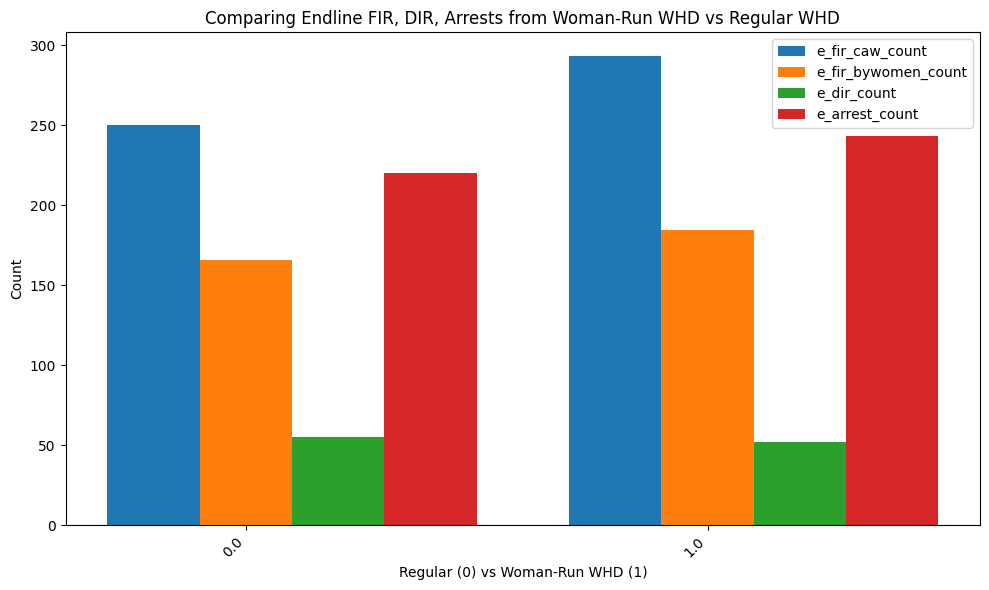

In [ ]:
#Create a grouped bar chart
columns_to_compare = ['e_fir_caw_count', 'e_fir_bywomen_count', 'e_dir_count', 'e_arrest_count']

grouped_data = filtered_admin_wide_station_level_means_data.groupby('women_whd')[columns_to_compare].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

width = 0.2
x = grouped_data['women_whd']

for i, column in enumerate(columns_to_compare):
    ax.bar(x.index + i * width, grouped_data[column], width, label=column)

ax.set_xlabel('Regular (0) vs Woman-Run WHD (1)')
ax.set_ylabel('Count')
ax.set_title('Comparing Endline FIR, DIR, Arrests from Woman-Run WHD vs Regular WHD')
ax.set_xticks(x.index + width)
ax.set_xticklabels(x)
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#The table above is a little confusing. It looks like there were fewer arrests as a result of Woman-Run WHD but more CAW, DIR, and FIR by Women. Maybe the fact that there were earlier actions taken meant fewer arrests were needed.

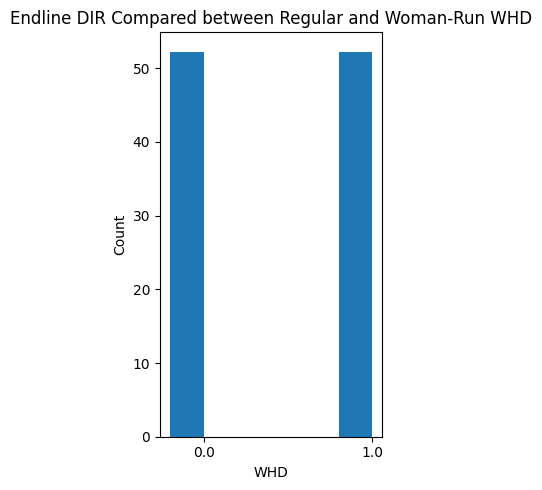

In [ ]:

columns_to_compare = ['e_dir_count']
grouped_data = admin_wide_station_level_means_data.groupby(['regular_whd', 'women_whd'])[columns_to_compare].sum().reset_index()

regular_whd_values = grouped_data['regular_whd'].unique()
women_whd_values = grouped_data['women_whd'].unique()

x_pos = np.arange(len(regular_whd_values))

width = 0.2

fig, ax = plt.subplots(figsize=(3, 5))

# Create bars for each column, grouped by 'regular_whd' and 'women_whd'
for i, column in enumerate(columns_to_compare):
    # Get data for the current column, filtered by 'women_whd' values
    #data_women_whd_0 = grouped_data[grouped_data['women_whd'] == women_whd_values[0]][column]
    data_women_whd_1 = grouped_data[grouped_data['women_whd'] == women_whd_values[1]][column]

    # Create bars for 'women_whd' = 0 and 'women_whd' = 1
    #ax.bar(x_pos + (i - 1) * width, data_women_whd_0, width, label=f'{column} (women_whd={women_whd_values[0]})')
    ax.bar(x_pos + i * width, data_women_whd_1, width, label=f'{column} (women_whd={women_whd_values[1]})')

# Set x-axis labels, title, and legend
ax.set_xticks(x_pos + width / 2)
ax.set_xticklabels(regular_whd_values)
ax.set_xlabel('WHD')
ax.set_ylabel('Count')
ax.set_title('Endline DIR Compared between Regular and Woman-Run WHD')
#ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Show the plot
plt.tight_layout()
plt.show()

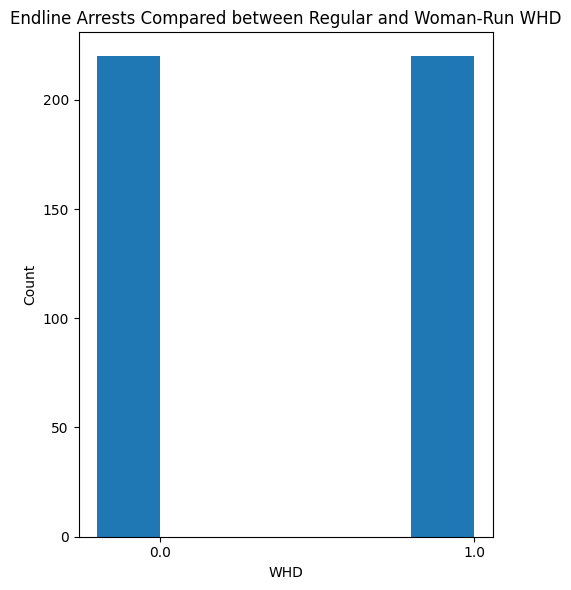

In [ ]:

columns_to_compare = ['e_arrest_count']

grouped_data = filtered_admin_wide_station_level_means_data.groupby(['regular_whd', 'women_whd'])[columns_to_compare].sum().reset_index()

regular_whd_values = grouped_data['regular_whd'].unique()
women_whd_values = grouped_data['women_whd'].unique()

x_pos = np.arange(len(regular_whd_values))

width = 0.2

fig, ax = plt.subplots(figsize=(5, 6))

# Create bars for each column, grouped by 'regular_whd' and 'women_whd'
for i, column in enumerate(columns_to_compare):
    # Get data for the current column, filtered by 'women_whd' values
    #data_women_whd_0 = grouped_data[grouped_data['women_whd'] == women_whd_values[0]][column]
    data_women_whd_1 = grouped_data[grouped_data['women_whd'] == women_whd_values[1]][column]

    # Create bars for 'women_whd' = 0 and 'women_whd' = 1
    #ax.bar(x_pos + (i - 1) * width, data_women_whd_0, width, label=f'{column} (women_whd={women_whd_values[0]})')
    ax.bar(x_pos + i * width, data_women_whd_1, width, label=f'{column} (women_whd={women_whd_values[1]})')

# Set x-axis labels, title, and legend
ax.set_xticks(x_pos + width / 2)
ax.set_xticklabels(regular_whd_values)
ax.set_xlabel('WHD')
ax.set_ylabel('Count')
ax.set_title('Endline Arrests Compared between Regular and Woman-Run WHD')
#ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Show the plot
plt.tight_layout()
plt.show()

# Again, not sure why the endline arrest count between Woman-Run WHD and Regular WHD is about the same.
It may be more about the difference between beginning and endline.

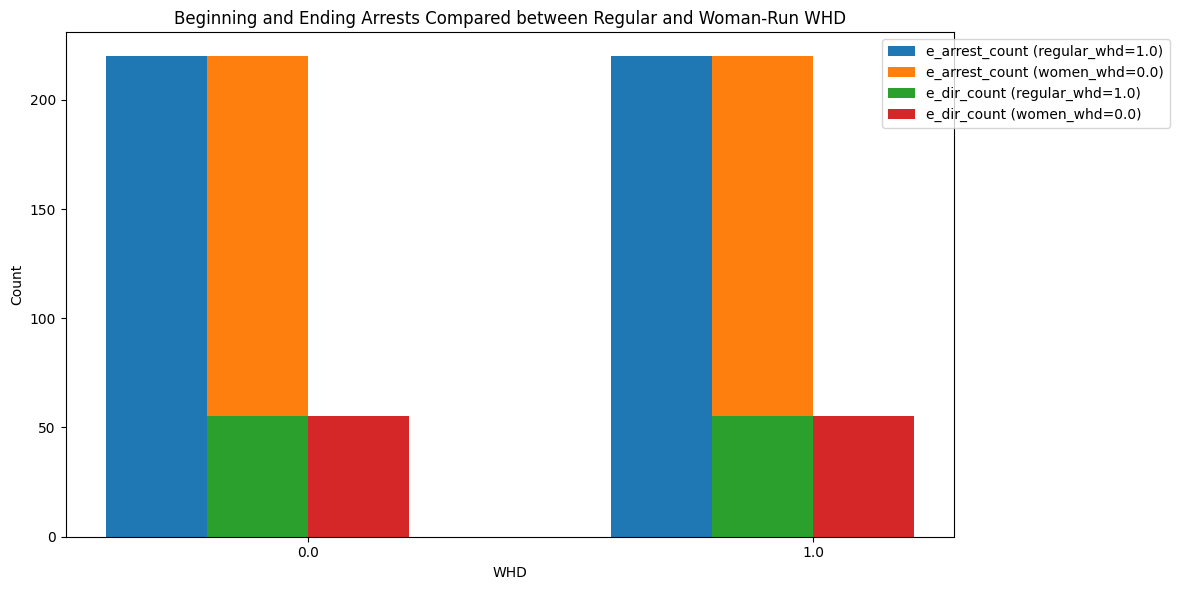

In [ ]:
columns_to_compare = ['e_arrest_count', 'e_dir_count']

grouped_data = filtered_admin_wide_station_level_means_data.groupby(['regular_whd', 'women_whd'])[columns_to_compare].sum().reset_index()

regular_whd_values = grouped_data['regular_whd'].unique()
women_whd_values = grouped_data['women_whd'].unique()

x_pos = np.arange(len(regular_whd_values))

width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

# Create bars for each column, grouped by 'regular_whd' and 'women_whd'
for i, column in enumerate(columns_to_compare):

    data_regular_whd_1 = grouped_data[grouped_data['regular_whd'] == regular_whd_values[1]][column]
    data_women_whd_1 = grouped_data[grouped_data['women_whd'] == women_whd_values[1]][column]

    # Create bars for 'women_whd' = 0 and 'women_whd' = 1
    ax.bar(x_pos + (i - 1) * width, data_regular_whd_1, width, label=f'{column} (regular_whd={regular_whd_values[1]})')
    ax.bar(x_pos + i * width, data_women_whd_1, width, label=f'{column} (women_whd={women_whd_values[1]})')

# Set x-axis labels, title, and legend
ax.set_xticks(x_pos + width / 2)
ax.set_xticklabels(regular_whd_values)
ax.set_xlabel('WHD')
ax.set_ylabel('Count')
ax.set_title('Beginning and Ending Arrests Compared between Regular and Woman-Run WHD')
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Show the plot
plt.tight_layout()
plt.show()

# When I compare between beginning and ending, it's still a similar result.
#Overall, there must be something in the calculations I'm inputting that is incorrect, but I am unable to pinpoint it in this or several of the above graphs.

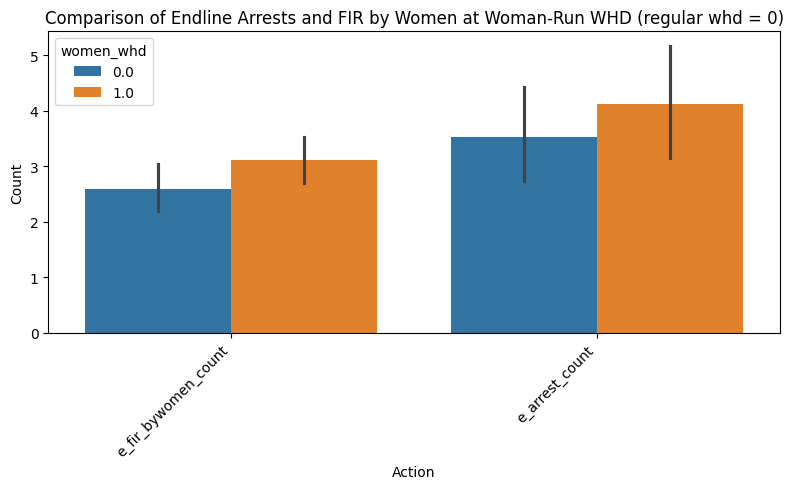

In [ ]:


# Columns to compare
columns_to_compare = ['e_fir_bywomen_count', 'e_arrest_count']

# Melt the data to a long format for easier plotting with seaborn
melted_data = admin_wide_station_level_means_data.melt(id_vars=['regular_whd', 'women_whd'],
                                           value_vars=columns_to_compare,
                                           var_name='Action', value_name='Count')

plt.figure(figsize=(8, 5))
sns.barplot(x='Action', y='Count', hue='women_whd', data=melted_data[melted_data['regular_whd'] == 0]) # Focusing on regular_whd == 0
plt.title('Comparison of Endline Arrests and FIR by Women at Woman-Run WHD (regular whd = 0)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# This is one of the most helpful graphs so far because it shows more clearly that woman-run WHD resulted in more actual actions than regular WHD.

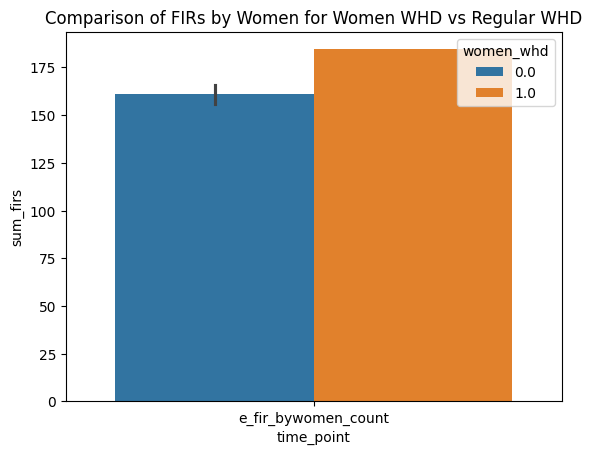

In [ ]:

# Group and sum data
grouped_data = admin_wide_station_level_means_data.groupby(['women_whd', 'regular_whd'])[['e_fir_bywomen_count']].sum().reset_index()

# Melt data for plotting
melted_data = pd.melt(grouped_data, id_vars=['women_whd', 'regular_whd'], value_vars=['e_fir_bywomen_count'], var_name='time_point', value_name='sum_firs')

# Create bar plot
sns.barplot(x='time_point', y='sum_firs', hue='women_whd', data=melted_data)
plt.title('Comparison of FIRs by Women for Women WHD vs Regular WHD')
plt.show()

# This graph more clearly shows the difference between the beginning and end of research.

#Woman-run WHD are resulting in more FIR while non-woman run WHD have about the same FIR.

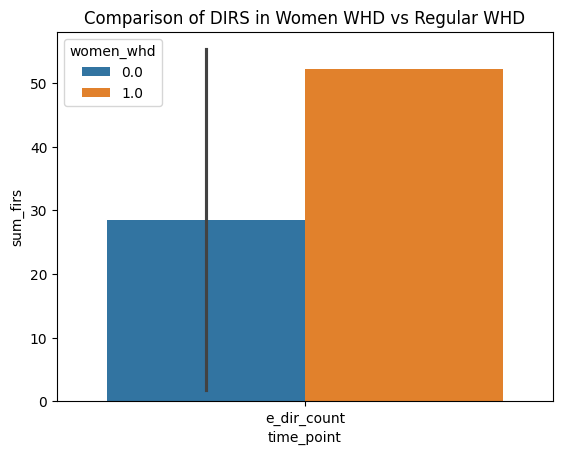

In [ ]:
# Group and sum data
grouped_data = admin_wide_station_level_means_data.groupby(['women_whd', 'regular_whd'])[['e_dir_count']].sum().reset_index()

# Melt data for plotting
melted_data = pd.melt(grouped_data, id_vars=['women_whd', 'regular_whd'], value_vars=['e_dir_count'], var_name='time_point', value_name='sum_firs')

# Create bar plot
sns.barplot(x='time_point', y='sum_firs', hue='women_whd', data=melted_data)
plt.title('Comparison of DIRS in Women WHD vs Regular WHD')
plt.show()

# A helpful graph showing the difference between the beginning and end of research.

#Woman-run WHD are resulting in more DIR.
#Additionally, awareness seems to be increasing across the board since non-woman-run WHD DIR also increased.

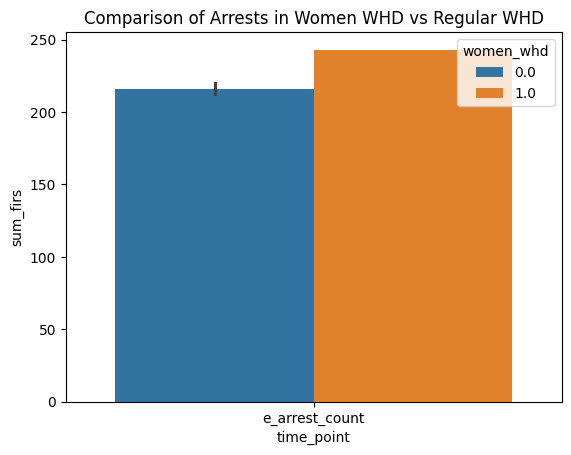

In [ ]:
# Group and sum data
grouped_data = admin_wide_station_level_means_data.groupby(['women_whd', 'regular_whd'])[['e_arrest_count']].sum().reset_index()

# Melt data for plotting
melted_data = pd.melt(grouped_data, id_vars=['women_whd', 'regular_whd'], value_vars=['e_arrest_count'], var_name='time_point', value_name='sum_firs')

# Create bar plot
sns.barplot(x='time_point', y='sum_firs', hue='women_whd', data=melted_data)
plt.title('Comparison of Arrests in Women WHD vs Regular WHD')
plt.show()

# As seen further up in the notebook, overall arrests decreased by the end of the research.

#A hypothesis is that this may be because earlier DIR and FIR were being filed, so action could be taken to mitigate violence before arrests were necessary.
#Looking back at the original paper, the researchers did not find any significant change in arrests as a result of treatment. There seemed to be little to report in terms of reasons.
#Therefore, my hypothesis is not supported by correlating research.

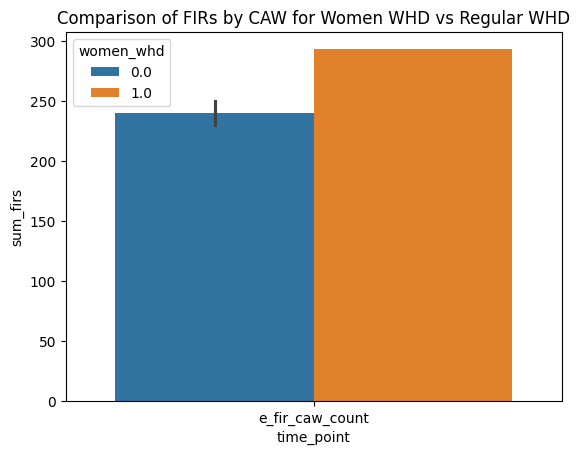

In [ ]:

# Group and sum data
grouped_data = admin_wide_station_level_means_data.groupby(['women_whd', 'regular_whd'])[['e_fir_caw_count']].sum().reset_index()

# Melt data for plotting
melted_data = pd.melt(grouped_data, id_vars=['women_whd', 'regular_whd'], value_vars=['e_fir_caw_count'], var_name='time_point', value_name='sum_firs')

# Create bar plot
sns.barplot(x='time_point', y='sum_firs', hue='women_whd', data=melted_data)
plt.title('Comparison of FIRs by CAW for Women WHD vs Regular WHD')
plt.show()

# This graph clearly shows that FIR concerning Crimes against Women were filed much more often in Woman-Run WHD than Regular WHD.
#This data helps make the case that having women running WHD results in more effectiveness in the WHD than when men run the WHD.




















# **EDA for Q2:**
##Addressing Question 2: How much does a WHD in a police station promote the reporting of GBV compared to a police station with no WHD?

GBV = Gender-Based Violence

Trying to find a way to combine regular_whd and women_whd because the question involves having a WHD (any type) vs not having a WHD

In [ ]:
#asked Gemini for starters on this paragraph of code:
#Separate treatment and control groups:
treatment_data = admin_wide_station_level_means_data[admin_wide_station_level_means_data['treatment'] == 'Treatment']
control_data = admin_wide_station_level_means_data[admin_wide_station_level_means_data['treatment'] == 'Control']

#Calculate the number of rows to remove from treatment_data:
num_rows_to_remove = len(treatment_data) // 2

#Randomly select indices to drop:
indices_to_drop = treatment_data.sample(n=num_rows_to_remove, random_state=42).index

#Drop the selected rows from treatment_data:
treatment_data = treatment_data.drop(indices_to_drop)

#Check - should be 60
treatment_data.shape
#treatment_data.value_counts()

(60, 10)

In [ ]:
#Calculate the sum of 'e_caw_rate' for combined_sample and control_data
control_e_caw_rate = control_data['e_caw_rate'].sum()
treatment_e_caw_rate = treatment_data['e_caw_rate'].sum()

print("Control Group:")
print(control_e_caw_rate)
print("\nTreatment Group:")
print(treatment_e_caw_rate)

Control Group:
6.433610798

Treatment Group:
4.716291649


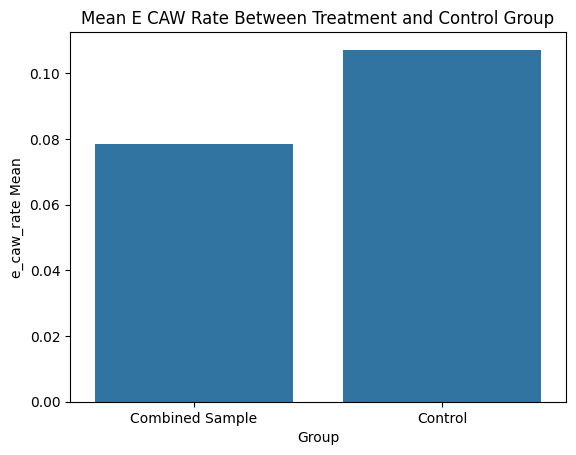

In [ ]:
treatment_data_mean = treatment_data['e_caw_rate'].mean()
control_data_mean = control_data['e_caw_rate'].mean()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Group': ['Combined Sample', 'Control'],
    'e_caw_rate Mean': [treatment_data_mean, control_data_mean]
})

# Create the bar plot using seaborn
sns.barplot(x='Group', y='e_caw_rate Mean', data=plot_data)
plt.title('Mean E CAW Rate Between Treatment and Control Group')
plt.ylabel('e_caw_rate Mean')
plt.show()

# This graph shows clearly that the reported CAW rate is higher in the control group.

In [ ]:

control_e_caw_rate = control_data['e_dir_count'].sum()
treatment_e_caw_rate = treatment_data['e_dir_count'].sum()

print("Control Group:")
print(control_e_caw_rate)
print("\nTreatment Group:")
print(treatment_e_caw_rate)

Control Group:
1.75

Treatment Group:
49.5


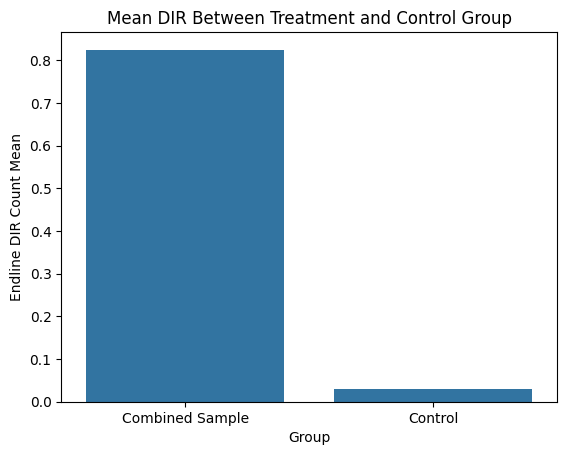

In [ ]:
treatment_data_mean = treatment_data['e_dir_count'].mean()
control_data_mean = control_data['e_dir_count'].mean()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Group': ['Combined Sample', 'Control'],
    'e_dir_count Mean': [treatment_data_mean, control_data_mean]
})

# Create the bar plot using seaborn
sns.barplot(x='Group', y='e_dir_count Mean', data=plot_data)
plt.title('Mean DIR Between Treatment and Control Group')
plt.ylabel('Endline DIR Count Mean')
plt.show()

# This graph more drastically shows the difference in filing Domestic Incidence Reports between police stations which have a WHD vs. police stations with no WHD. But look at the y-axis: it's all less than 1 per month.
#This means that just a few more women are coming forward to report GBV when there is a WHD in the station.

In [ ]:

control_e_arrest_count = control_data['e_arrest_count'].sum()
treatment_e_arrest_count = treatment_data['e_arrest_count'].sum()

print("Control Group:")
print(control_e_arrest_count)
print("\nTreatment Group:")
print(treatment_e_arrest_count)

Control Group:
212.25

Treatment Group:
218.625


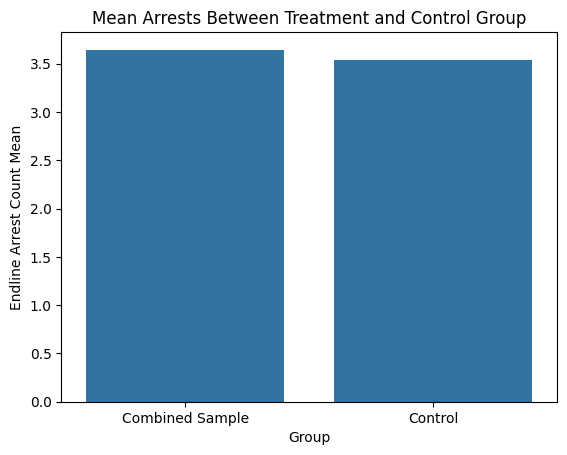

In [ ]:
treatment_data_mean = treatment_data['e_arrest_count'].mean()
control_data_mean = control_data['e_arrest_count'].mean()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Group': ['Combined Sample', 'Control'],
    'e_arrest_count Mean': [treatment_data_mean, control_data_mean]
})

# Create the bar plot using seaborn
sns.barplot(x='Group', y='e_arrest_count Mean', data=plot_data)
plt.title('Mean Arrests Between Treatment and Control Group')
plt.ylabel('Endline Arrest Count Mean')
plt.show()

# This graph is interesting because arrests related to either type of station are similar.

In [ ]:

control_e_fir_bywomen_count = control_data['e_fir_bywomen_count'].sum()
treatment_e_fir_bywomen_count = treatment_data['e_fir_bywomen_count'].sum()

print("Control Group:")
print(control_e_fir_bywomen_count)
print("\nTreatment Group:")
print(treatment_e_fir_bywomen_count)

Control Group:
156.0

Treatment Group:
168.5


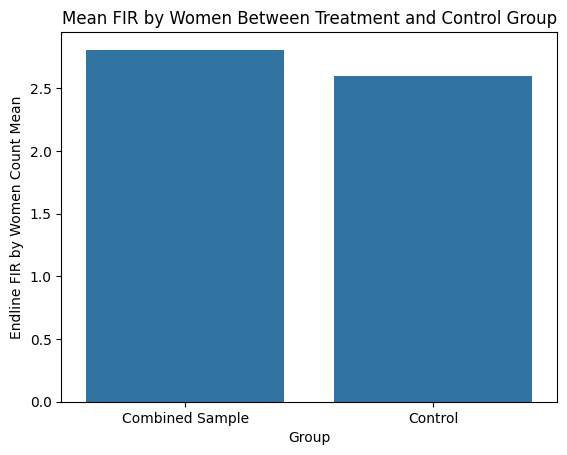

In [ ]:
treatment_data_mean = treatment_data['e_fir_bywomen_count'].mean()
control_data_mean = control_data['e_fir_bywomen_count'].mean()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Group': ['Combined Sample', 'Control'],
    'e_fir_bywomen_count Mean': [treatment_data_mean, control_data_mean]
})

# Create the bar plot using seaborn
sns.barplot(x='Group', y='e_fir_bywomen_count Mean', data=plot_data)
plt.title('Mean FIR by Women Between Treatment and Control Group')
plt.ylabel('Endline FIR by Women Count Mean')
plt.show()

#This graph shows that there are more FIR filed by women in the treatment group, which makes sense. It's almost surprising that the control group has any FIR filed by women at all.

In [ ]:
control_e_fir_overall_count = control_data['e_fir_overall_count'].sum()
treatment_e_fir_overall_count = treatment_data['e_fir_overall_count'].sum()

print("Control Group:")
print(control_e_fir_overall_count)
print("\nTreatment Group:")
print(treatment_e_fir_overall_count)

Control Group:
1937.0

Treatment Group:
1916.375


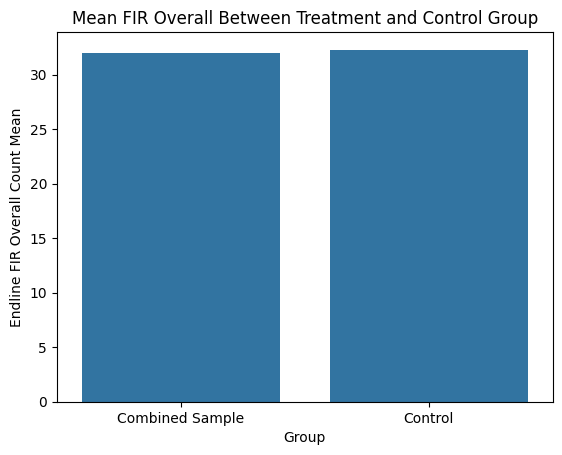

In [ ]:
treatment_data_mean = treatment_data['e_fir_overall_count'].mean()
control_data_mean = control_data['e_fir_overall_count'].mean()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Group': ['Combined Sample', 'Control'],
    'e_fir_overall_count Mean': [treatment_data_mean, control_data_mean]
})

# Create the bar plot using seaborn
sns.barplot(x='Group', y='e_fir_overall_count Mean', data=plot_data)
plt.title('Mean FIR Overall Between Treatment and Control Group')
plt.ylabel('Endline FIR Overall Count Mean')
plt.show()

#Because the Overall FIR is similar to FIR by Women between control and treatment groups, the increase may be due to the FIR by Women.

<ipython-input-63-9c2c17319377>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_data['control'] = 1   # Add a 'control' column to control_data with value 0


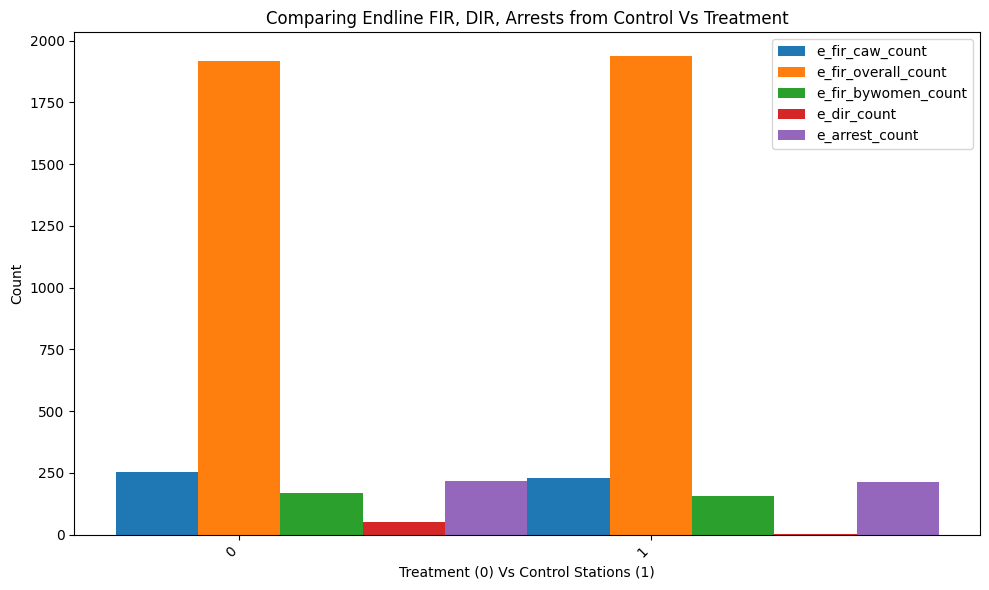

In [ ]:

columns_to_compare = ['e_fir_caw_count', 'e_fir_overall_count', 'e_fir_bywomen_count', 'e_dir_count', 'e_arrest_count']

treatment_data['control'] = 0
control_data['control'] = 1

grouped_data = pd.concat([treatment_data, control_data]).groupby('control')[columns_to_compare].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

width = 0.2
x = grouped_data['control']

for i, column in enumerate(columns_to_compare):
    ax.bar(x.index + i * width, grouped_data[column], width, label=column)

ax.set_xlabel('Treatment (0) Vs Control Stations (1)')
ax.set_ylabel('Count')
ax.set_title('Comparing Endline FIR, DIR, Arrests from Control Vs Treatment')
ax.set_xticks(x.index + width)
ax.set_xticklabels(x)
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()